In [1]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.DataFrame()
df = tabula.read_pdf("2015-2016.pdf", pages="all", multiple_tables=True)

In [34]:
print(df[21])

                                      0              1              2  \
0                    Total Allocations:  $1,901,386.14  $2,030,626.14   
1      Total Revenue from Student Fees:  $1,650,000.00  $1,650,000.00   
2             Total Revenue from CASSA:    $250,000.00    $250,000.00   
3            Total Revenue from CACSSF:     $33,333.33     $33,333.33   
4                Total Funds Remaining:     $31,947.19    -$97,292.81   
5  Total Transfer from General Reserve:          $0.00     $97,292.81   
6  Total Carry Forwarded from FY 13/14:    $164,324.47     $35,084.47   
7   Total Remaining in General Reserve:    $770,058.56    $640,818.56   

               3  
0  $2,060,326.14  
1  $1,650,000.00  
2    $250,000.00  
3     $33,333.33  
4   -$126,992.81  
5    $126,992.81  
6      $5,384.47  
7    $611,118.56  


In [46]:
def process_df_group(df_start_index, df_end_index=None):
    """
    takes in indices of df and returns processed df
    """
    # select df groups
    if df_end_index == None:
        df_spliced = df[df_start_index] 

        # set first row as header
        df_spliced.columns = df_spliced.iloc[0]
        df_spliced = df_spliced.reindex(df_spliced.index.drop(0))
    else:
        df_spliced_multiple = df[df_start_index:df_end_index]
        
        for i in range(len(df_spliced_multiple)):
            df_spliced_multiple[i] = df_spliced_multiple[i].dropna(axis=1, how='all')
            
        # set first row as header
        df_columns = df_spliced_multiple[0].iloc[0]
        #print('Cols', df_columns)
        df_spliced_multiple[0] = df_spliced_multiple[0].reindex(df_spliced_multiple[0].index.drop(0))
        
        #print(df_spliced_multiple[0])
        for i in range(1, len(df_spliced_multiple)):
            #print('Next Cols', df_spliced_multiple[i].columns)
            df_spliced_multiple[i].columns = df_columns
        
        df_spliced = pd.concat(df_spliced_multiple)
            
    #print('-------')

    # columns to parse dollar values
    dollar_cols = ['FUNDING REQUEST', 'CFO', 'FINANCE COMMITTEE', 'FINAL ALLOCATION'] 

    print(df_spliced.columns)
    # convert dollar values to float values
    for col in dollar_cols:
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace('$', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: str(x).replace(',', ''))
        df_spliced[col] = df_spliced[col].apply(lambda x: float(x))

    df_spliced = df_spliced.astype(float, raise_on_error=False)
        
    # remove last row (subtotal row)
    df_spliced = df_spliced[:-1]
    
    # add column for difference between allocation and request
    df_spliced['DIFFERENCE'] = df_spliced['FINAL ALLOCATION'] - df_spliced['FUNDING REQUEST']
    
    # rename first column from organization type to club name
    df_spliced.columns.values[0] = 'NAME'
    
    return df_spliced


In [47]:
# categories = list of dataframes for each major category
categories = []

category_names = ['publications', 'student_activity_groups', 'student_initiated_service_groups',
                 'asuc_programs_and_operations', 'president_office', 'evp_office', 'eavp_office',
                 'aavp_office', 'osa_office', 'senate', 'asuc_total', 'graduate_assembly', 'totals']

category_splices = [[0, None], [1, 7], [7, 11], [11, None], [12, None], [13, None], [14, None], [15, None],
                   [16, None]]
"""
TODO
other values not processed
[[17, 19], [19, None], [20, None], [21, None]]
"""
for splice in category_splices:
    print(splice)
    categories.append(process_df_group(splice[0], splice[1]))

print('-------------------------------------------------------')
print(categories[0])

[0, None]
Index(['PUBLICATION GROUPS', 'TYPE (YEAR)', 'FUNDING REQUEST', 'CFO',
       'FINANCE COMMITTEE', 'FINAL ALLOCATION'],
      dtype='object', name=0)
[1, 7]
Index(['STUDENT ACTIVITY GROUPS',             'TYPE (YEAR)',
               'FUNDING REQUEST',                     'CFO',
             'FINANCE COMMITTEE',        'FINAL ALLOCATION',
                               0,                         1,
                               2,                         3,
                               4,                         5],
      dtype='object')


/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)
/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:37: RuntimeWarning: unorderable types: int() > str(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)
/Users/edsa/anaconda/lib/python3.5/site-packages/pandas/indexes/api.py:37: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)


[7, 11]
Index([                                 0,                                  1,
                                        2,                                  3,
                                        4,                                  5,
       'STUDENT-INITIATED SERVICE GROUPS',                      'TYPE (YEAR)',
                        'FUNDING REQUEST',                              'CFO',
                      'FINANCE COMMITTEE',                 'FINAL ALLOCATION'],
      dtype='object')
[11, None]
Index(['ASUC PROGRAMS & OPERATIONS', 'TYPE', 'FUNDING REQUEST', 'CFO',
       'FINANCE COMMITTEE', 'FINAL ALLOCATION'],
      dtype='object', name=0)
[12, None]
Index(['OFFICE OF THE PRESIDENT', 'TYPE', 'FUNDING REQUEST', 'CFO',
       'FINANCE COMMITTEE', 'FINAL ALLOCATION'],
      dtype='object', name=0)
[13, None]
Index(['OFFICE OF THE EXECUTIVE VICE PRESIDENT', 'TYPE', 'FUNDING REQUEST',
       'CFO', 'FINANCE COMMITTEE', 'FINAL ALLOCATION'],
      dtype='object', name=0)
[14

In [48]:
def join_pages(lst_df):
    if type(lst_df) != list:
        return lst_df
    df = lst_df[0]
    for i in range(1,len(lst_df)):
        df = df.append(lst_df[i])
    return df

In [49]:
joined_categories = list(map(join_pages, categories))

# Money Allocated by Organization Type

Each Org and Clubs + Amounts Received

PUB (15)


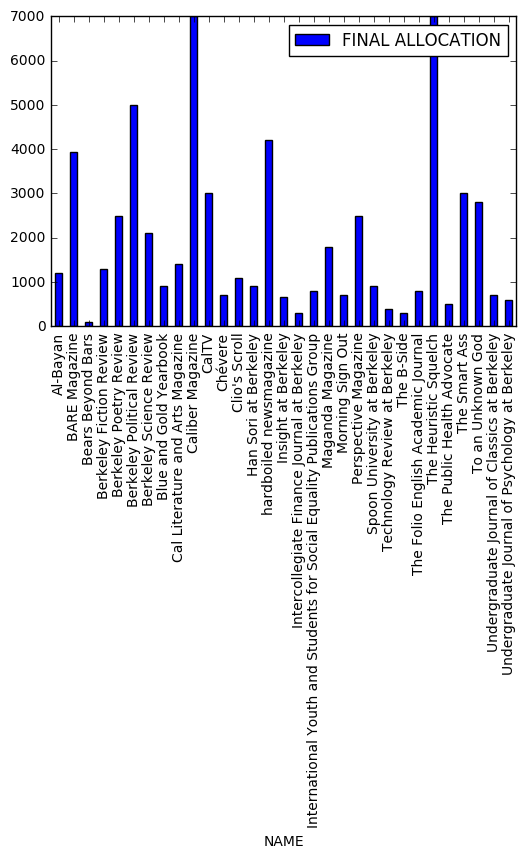

1        NaN
1    SAG (1)
1    SAG (2)
1    SAG (2)
1    SAG (3)
1    SAG (3)
Name: TYPE (YEAR), dtype: object


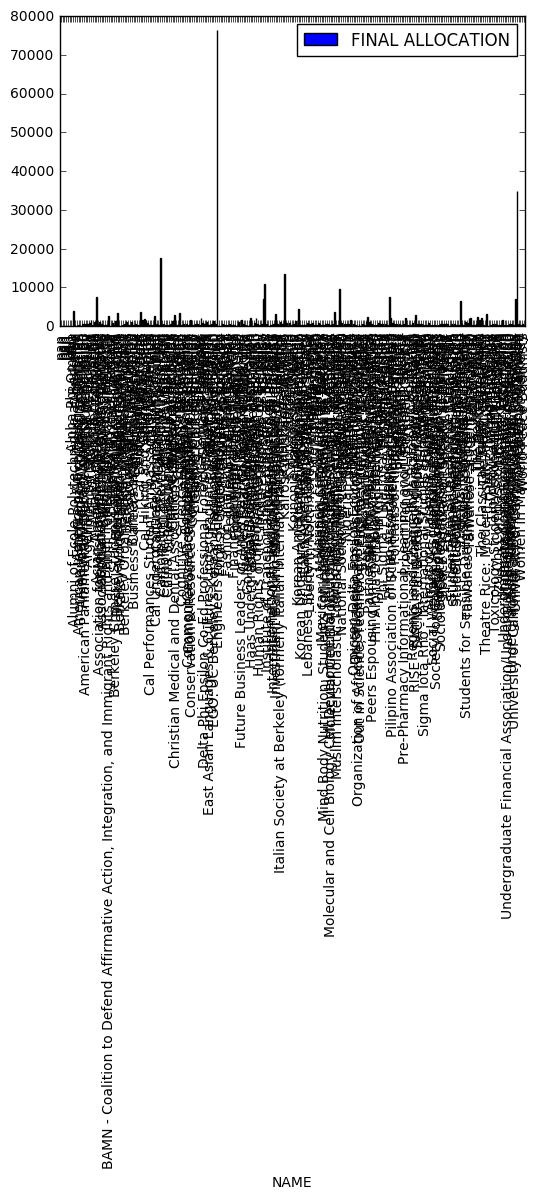

1         NaN
1    SISG (8)
1    SISG (1)
1    SISG (6)
Name: TYPE (YEAR), dtype: object


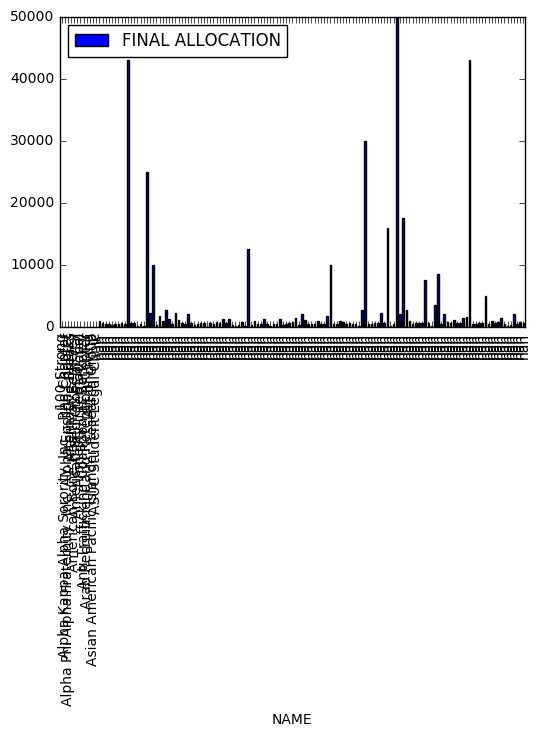

KeyError: 'TYPE (YEAR)'

In [50]:
for i in range(len(categories)):
    print(categories[i]['TYPE (YEAR)'][1])
    plt.figure()
    categories[i].plot.bar(x='NAME',y='FINAL ALLOCATION')
    plt.show()

Roll Up on Org

# Money Requested by Organization Type

Each Org and Clubs + Amounts Requested

PUB (15)


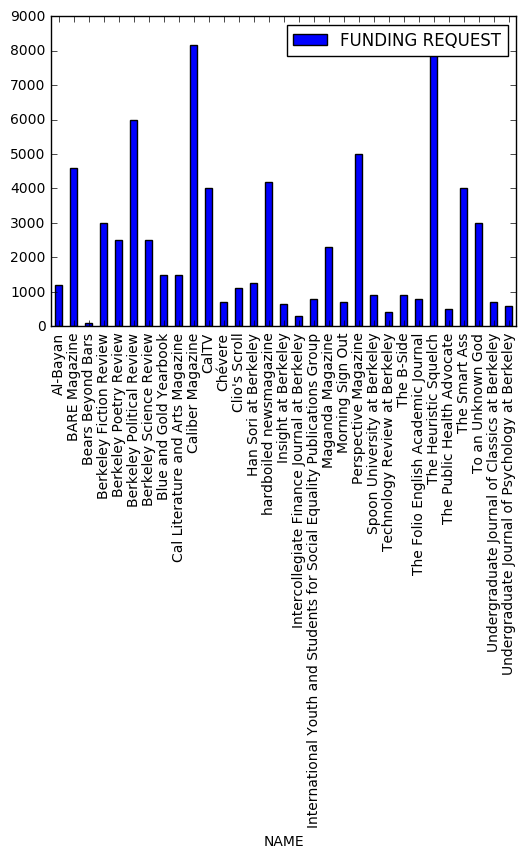

1        NaN
1    SAG (1)
1    SAG (2)
1    SAG (2)
1    SAG (3)
1    SAG (3)
Name: TYPE (YEAR), dtype: object


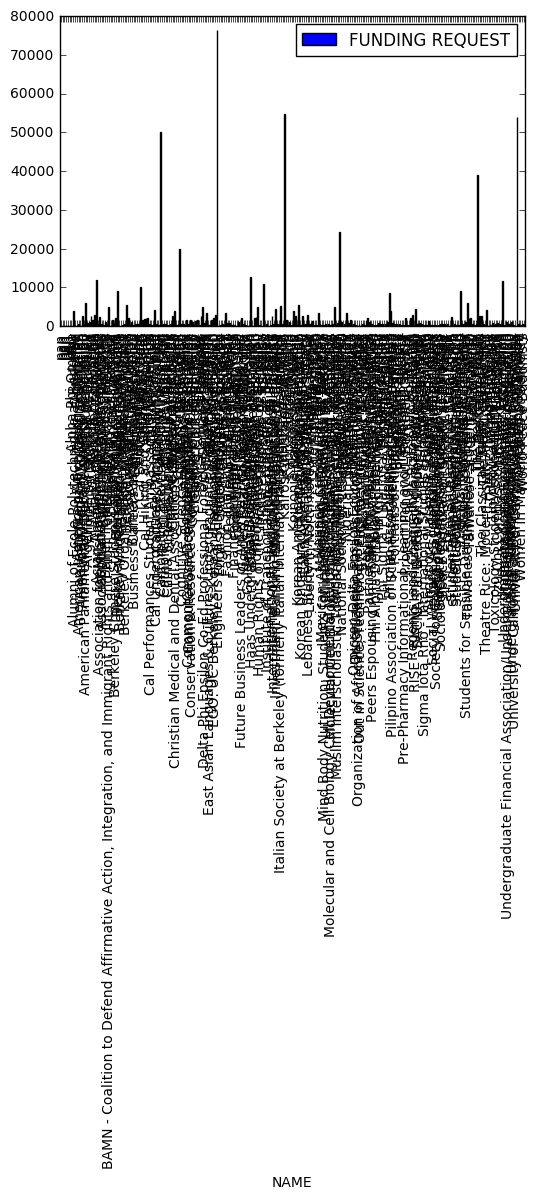

1         NaN
1    SISG (8)
1    SISG (1)
1    SISG (6)
Name: TYPE (YEAR), dtype: object


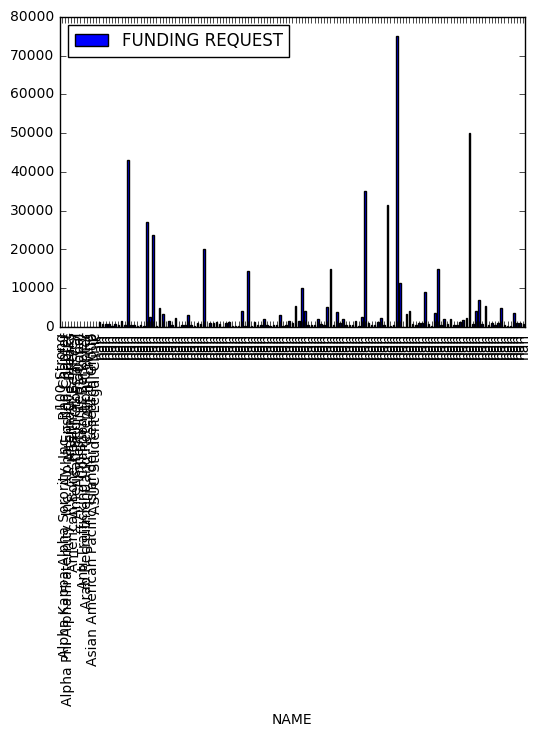

KeyError: 'TYPE (YEAR)'

In [51]:
for i in range(len(categories)):
    print(categories[i]['TYPE (YEAR)'][1])
    plt.figure()
    categories[i].plot.bar(x='NAME',y='FUNDING REQUEST')
    plt.show()

Roll Up on Org

# Money Requested vs. Allocated by Organization Type

In [ ]:
for i in range(len(categories)):
    print(categories[i]['TYPE (YEAR)'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='NAME',y='FUNDING REQUEST')
    categories[i].plot(kind='bar', color='green', ax=ax, position=1, x='NAME',y='FINAL ALLOCATION')
    plt.show()

# Difference in Money Requested vs. Allocated by Organization Type

PUB (15)


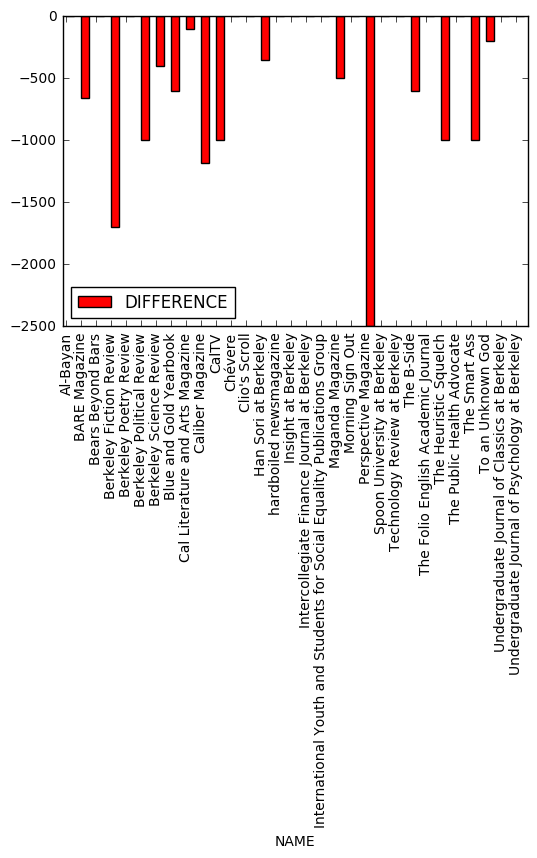

1        NaN
1    SAG (1)
1    SAG (2)
1    SAG (2)
1    SAG (3)
1    SAG (3)
Name: TYPE (YEAR), dtype: object


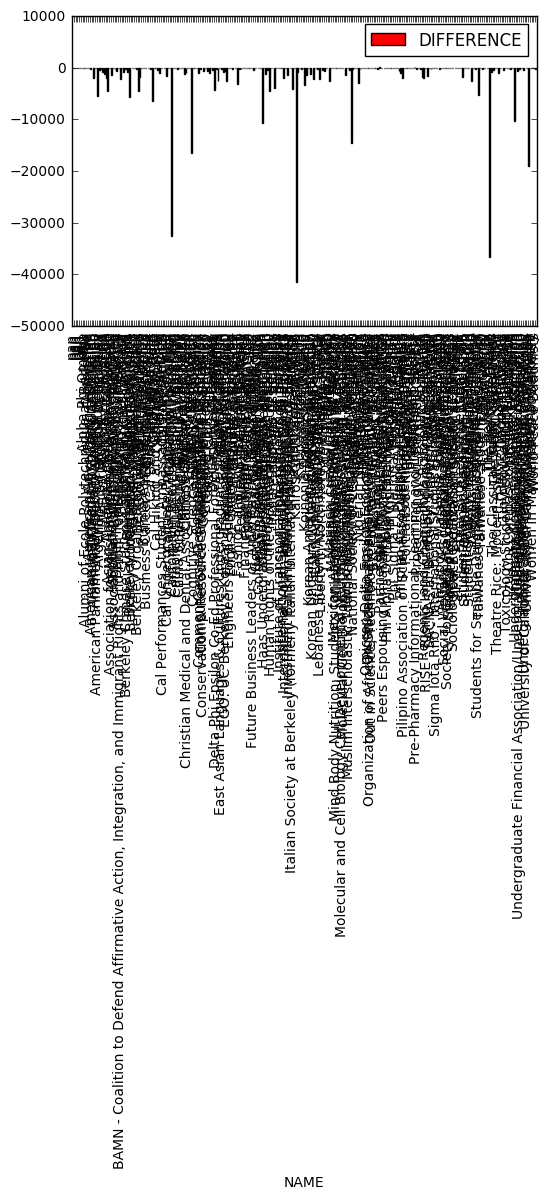

1         NaN
1    SISG (8)
1    SISG (1)
1    SISG (6)
Name: TYPE (YEAR), dtype: object


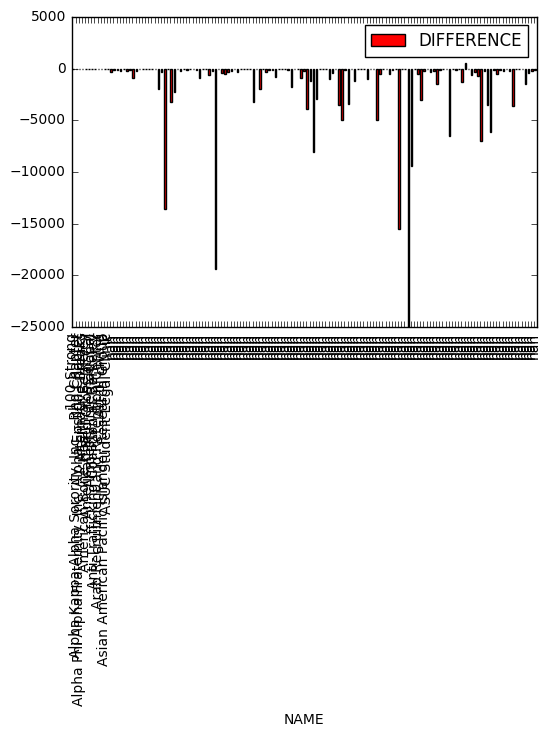

KeyError: 'TYPE (YEAR)'

In [52]:
for i in range(len(categories)):
    print(categories[i]['TYPE (YEAR)'][1])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    categories[i].plot(kind='bar', color='red', ax=ax, position=0, x='NAME',y='DIFFERENCE')
    plt.show()

# Top 10 Differences in Money Requested vs. Allocated by Organization Type

PUB (15)
0                     NAME TYPE (YEAR)  FUNDING REQUEST     CFO  \
1                 Al-Bayan    PUB (15)           1200.0  1200.0   
2            BARE Magazine     PUB (9)           4600.0  1300.0   
3        Bears Beyond Bars     PUB (1)            100.0   100.0   
4  Berkeley Fiction Review    PUB (32)           3000.0   800.0   
5   Berkeley Poetry Review    PUB (21)           2500.0  1500.0   

0  FINANCE COMMITTEE  FINAL ALLOCATION  DIFFERENCE  
1             1200.0            1200.0         0.0  
2             3940.0            3940.0      -660.0  
3              100.0             100.0         0.0  
4             1300.0            1300.0     -1700.0  
5             2500.0            2500.0         0.0  
0                                                NAME TYPE (YEAR)  \
1                                            Al-Bayan    PUB (15)   
13                                      Clio's Scroll    PUB (16)   
30      Undergraduate Journal of Classics at Berkeley     PUB (

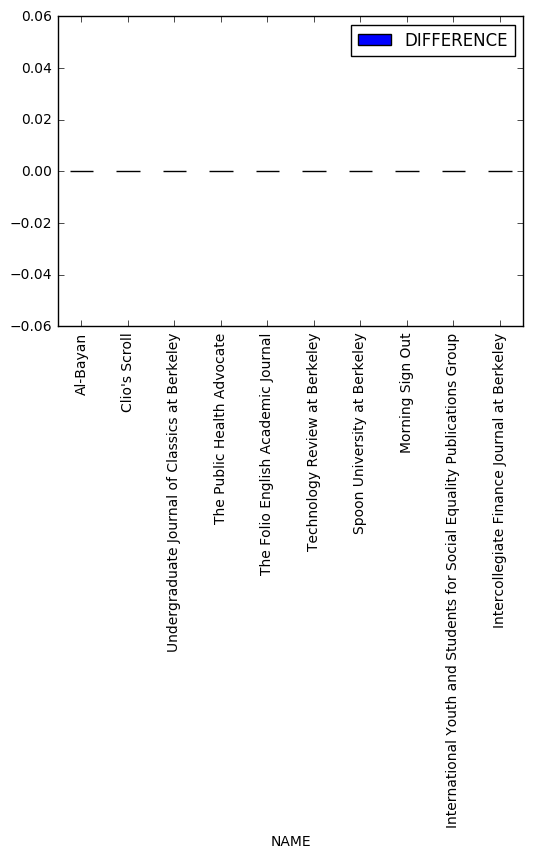

1        NaN
1    SAG (1)
1    SAG (2)
1    SAG (2)
1    SAG (3)
1    SAG (3)
Name: TYPE (YEAR), dtype: object
  NAME TYPE (YEAR)  FUNDING REQUEST  CFO  FINANCE COMMITTEE  FINAL ALLOCATION  \
1  NaN         NaN              NaN  NaN                NaN               NaN   
2  NaN         NaN              NaN  NaN                NaN               NaN   
3  NaN         NaN              NaN  NaN                NaN               NaN   
4  NaN         NaN              NaN  NaN                NaN               NaN   
5  NaN         NaN              NaN  NaN                NaN               NaN   

                            0         1          2          3          4  \
1                   [make]new   SAG (2)    $600.00    $500.00    $500.00   
2                 Abba Modern   SAG (4)    $900.00    $600.00    $600.00   
3             acts2fellowship  SAG (14)  $4,990.00  $3,000.00  $3,000.00   
4  Afghan Student Association   SAG (7)  $1,200.00    $600.00    $600.00   
5                   AF

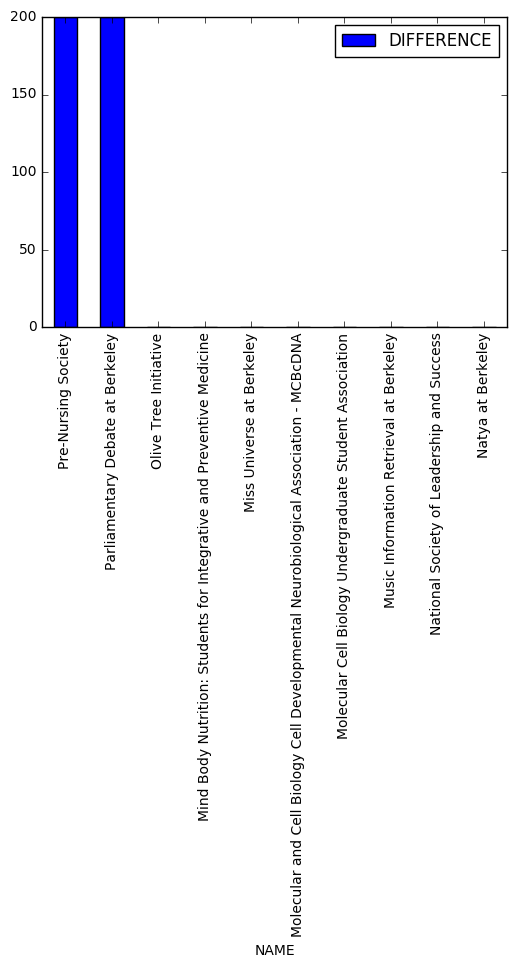

1         NaN
1    SISG (8)
1    SISG (1)
1    SISG (6)
Name: TYPE (YEAR), dtype: object
                                                NAME          1           2  \
1                                         100 Strong   SISG (2)   $1,000.00   
2     Alpha Kappa Alpha Sorority, Inc. - Rho Chapter   SISG (2)     $600.00   
3  Alpha Phi Alpha Fraternity, Inc. Alpha Epsilon...  SISG (13)   $2,000.00   
4                                 Alternative Breaks  SISG (13)  $45,000.00   
5                   American Bone Health at Berkeley   SISG (1)     $500.00   

           3          4          5 STUDENT-INITIATED SERVICE GROUPS  \
1    $600.00    $600.00    $600.00                              NaN   
2    $600.00    $600.00    $600.00                              NaN   
3  $2,000.00  $2,000.00  $2,000.00                              NaN   
4  $1,000.00  $2,400.00  $2,400.00                              NaN   
5    $500.00    $500.00    $500.00                              NaN   

  TYPE (Y

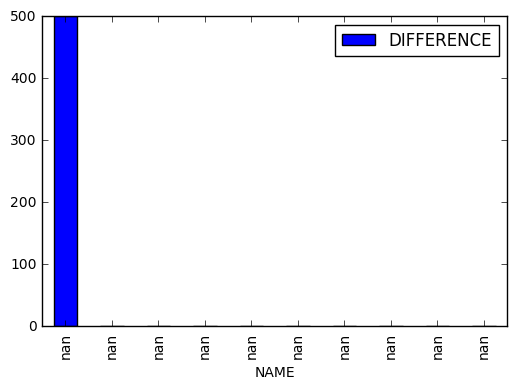

KeyError: 'TYPE (YEAR)'

In [53]:
for i in range(len(categories)):
    print(categories[i]['TYPE (YEAR)'][1])
    
    plt.figure()
    print(categories[i].head())
    print(categories[i].sort_values(['DIFFERENCE'], ascending=False, inplace=False)[0:10])
    print(categories[i].sort_values(['DIFFERENCE'], ascending=False, inplace=False)[0:10].plot(kind='bar', x='NAME',y='DIFFERENCE'))
    plt.show()

# Money Based on Age of Club (# of Years)

# Do Cultural Organizations Get More Money?
